In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("dada2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'dada2'"


## Analysis Request

Good morning,
We kindly request the analysis of the microbiome up to the species level of the uploaded fastqs, with statistical analyses comparing the samples of the group with the letter a in the name vs b. We request the calculation of the alpha and beta diversity at the genus and species level with graphical representation (i.e PCOA) and graphs that allow a visualization of the microbial composition (i.e. heatmap) at the phylum, genus and species level. We also request the identification and visualization through graphs of microbial clusters and networks.
Thank you

## Dada2 Tutorial

In [6]:
library(dada2); packageVersion("dada2")

[1] '1.34.0'

In [7]:
path <- "./data/fastq" # CHANGE ME to the directory containing the fastq files after unzipping.
list.files(path)

[1] "3739b_S122_L001_R1_001.fastq.gz" "3739b_S122_L001_R2_001.fastq.gz"
  [3] "3789b_S124_L001_R1_001.fastq.gz" "3789b_S124_L001_R2_001.fastq.gz"
  [5] "3813a_S118_L001_R1_001.fastq.gz" "3813a_S118_L001_R2_001.fastq.gz"
  [7] "3819b_S126_L001_R1_001.fastq.gz" "3819b_S126_L001_R2_001.fastq.gz"
  [9] "3824b_S127_L001_R1_001.fastq.gz" "3824b_S127_L001_R2_001.fastq.gz"
 [11] "3861b_S128_L001_R1_001.fastq.gz" "3861b_S128_L001_R2_001.fastq.gz"
 [13] "3863a_S111_L001_R1_001.fastq.gz" "3863a_S111_L001_R2_001.fastq.gz"
 [15] "3894b_S129_L001_R1_001.fastq.gz" "3894b_S129_L001_R2_001.fastq.gz"
 [17] "3905a_S29_L001_R1_001.fastq.gz"  "3905a_S29_L001_R2_001.fastq.gz" 
 [19] "3909a_S30_L001_R1_001.fastq.gz"  "3909a_S30_L001_R2_001.fastq.gz" 
 [21] "3921a_S32_L001_R1_001.fastq.gz"  "3921a_S32_L001_R2_001.fastq.gz" 
 [23] "3924a_S33_L001_R1_001.fastq.gz"  "3924a_S33_L001_R2_001.fastq.gz" 
 [25] "3946a_S35_L001_R1_001.fastq.gz"  "3946a_S35_L001_R2_001.fastq.gz" 
 [27] "3950a_S36_L001_R1_001.fastq.gz"  "3950a_S36_L001_R2_001.fastq.gz" 
 [29] "3966a_S37_L001_R1_001.fastq.gz"  "3966a_S37_L001_R2_001.fastq.gz" 
 [31] "3977b_S130_L001_R1_001.fastq.gz" "3977b_S130_L001_R2_001.fastq.gz"
 [33] "3989b_S131_L001_R1_001.fastq.gz" "3989b_S131_L001_R2_001.fastq.gz"
 [35] "4045b_S133_L001_R1_001.fastq.gz" "4045b_S133_L001_R2_001.fastq.gz"
 [37] "4073b_S115_L001_R1_001.fastq.gz" "4073b_S115_L001_R2_001.fastq.gz"
 [39] "4078a_S116_L001_R1_001.fastq.gz" "4078a_S116_L001_R2_001.fastq.gz"
 [41] "4133a_S39_L001_R1_001.fastq.gz"  "4133a_S39_L001_R2_001.fastq.gz" 
 [43] "4146b_S109_L001_R1_001.fastq.gz" "4146b_S109_L001_R2_001.fastq.gz"
 [45] "4171b_S113_L001_R1_001.fastq.gz" "4171b_S113_L001_R2_001.fastq.gz"
 [47] "4177a_S40_L001_R1_001.fastq.gz"  "4177a_S40_L001_R2_001.fastq.gz" 
 [49] "4206a_S41_L001_R1_001.fastq.gz"  "4206a_S41_L001_R2_001.fastq.gz" 
 [51] "4207a_S114_L001_R1_001.fastq.gz" "4207a_S114_L001_R2_001.fastq.gz"
 [53] "4219a_S17_L001_R1_001.fastq.gz"  "4219a_S17_L001_R2_001.fastq.gz" 
 [55] "4234a_S134_L001_R1_001.fastq.gz" "4234a_S134_L001_R2_001.fastq.gz"
 [57] "4235b_S135_L001_R1_001.fastq.gz" "4235b_S135_L001_R2_001.fastq.gz"
 [59] "4237a_S18_L001_R1_001.fastq.gz"  "4237a_S18_L001_R2_001.fastq.gz" 
 [61] "4240a_S19_L001_R1_001.fastq.gz"  "4240a_S19_L001_R2_001.fastq.gz" 
 [63] "4245b_S108_L001_R1_001.fastq.gz" "4245b_S108_L001_R2_001.fastq.gz"
 [65] "4247a_S20_L001_R1_001.fastq.gz"  "4247a_S20_L001_R2_001.fastq.gz" 
 [67] "4252b_S107_L001_R1_001.fastq.gz" "4252b_S107_L001_R2_001.fastq.gz"
 [69] "4259b_S106_L001_R1_001.fastq.gz" "4259b_S106_L001_R2_001.fastq.gz"
 [71] "4277b_S94_L001_R1_001.fastq.gz"  "4277b_S94_L001_R2_001.fastq.gz" 
 [73] "4299a_S22_L001_R1_001.fastq.gz"  "4299a_S22_L001_R2_001.fastq.gz" 
 [75] "4300a_S23_L001_R1_001.fastq.gz"  "4300a_S23_L001_R2_001.fastq.gz" 
 [77] "4310b_S95_L001_R1_001.fastq.gz"  "4310b_S95_L001_R2_001.fastq.gz" 
 [79] "4347b_S96_L001_R1_001.fastq.gz"  "4347b_S96_L001_R2_001.fastq.gz" 
 [81] "4379b_S97_L001_R1_001.fastq.gz"  "4379b_S97_L001_R2_001.fastq.gz" 
 [83] "4381b_S98_L001_R1_001.fastq.gz"  "4381b_S98_L001_R2_001.fastq.gz" 
 [85] "4397b_S99_L001_R1_001.fastq.gz"  "4397b_S99_L001_R2_001.fastq.gz" 
 [87] "4402b_S100_L001_R1_001.fastq.gz" "4402b_S100_L001_R2_001.fastq.gz"
 [89] "4414a_S117_L001_R1_001.fastq.gz" "4414a_S117_L001_R2_001.fastq.gz"
 [91] "4415b_S101_L001_R1_001.fastq.gz" "4415b_S101_L001_R2_001.fastq.gz"
 [93] "4426b_S102_L001_R1_001.fastq.gz" "4426b_S102_L001_R2_001.fastq.gz"
 [95] "4429b_S103_L001_R1_001.fastq.gz" "4429b_S103_L001_R2_001.fastq.gz"
 [97] "4436a_S24_L001_R1_001.fastq.gz"  "4436a_S24_L001_R2_001.fastq.gz" 
 [99] "4448b_S104_L001_R1_001.fastq.gz" "4448b_S104_L001_R2_001.fastq.gz"
[101] "4457b_S105_L001_R1_001.fastq.gz" "4457b_S105_L001_R2_001.fastq.gz"
[103] "filtered"

In [8]:
# Forward and reverse fastq filenames have format: SAMPLENAME_R1_001.fastq and SAMPLENAME_R2_001.fastq
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

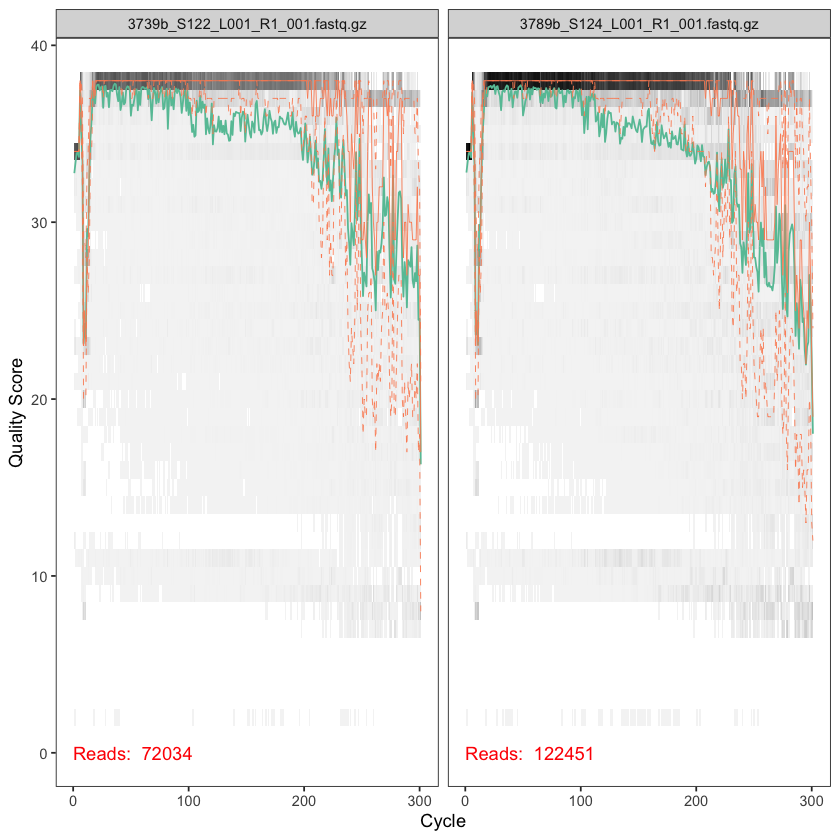

In [9]:
plotQualityProfile(fnFs[1:2])

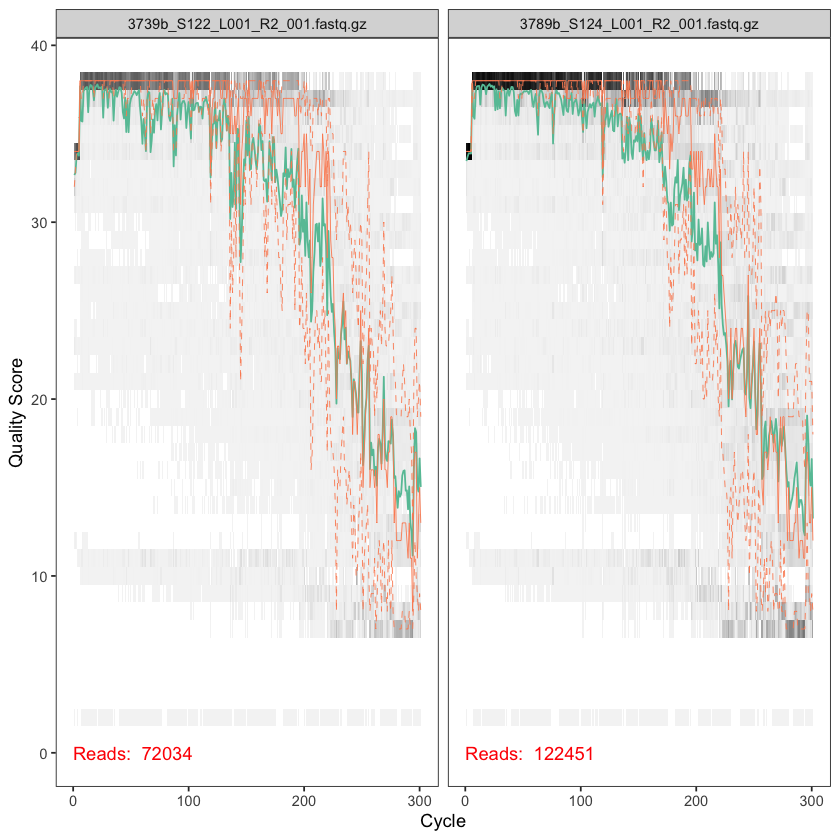

In [10]:
plotQualityProfile(fnRs[1:2])


## Filtering and trimming

In [14]:
# Place filtered files in filtered/ subdirectory
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))
names(filtFs) <- sample.names
names(filtRs) <- sample.names

In [62]:
?filterAndTrim

filterAndTrim              package:dada2               R Documentation

_F_i_l_t_e_r _a_n_d _t_r_i_m _f_a_s_t_q _f_i_l_e(_s).

_D_e_s_c_r_i_p_t_i_o_n:

     Filters and trims an input fastq file(s) (can be compressed) based
     on several user-definable criteria, and outputs fastq file(s)
     (compressed by default) containing those trimmed reads which
     passed the filters. Corresponding forward and reverse fastq
     file(s) can be provided as input, in which case filtering is
     performed on the forward and reverse reads independently, and both
     reads must pass for the read pair to be output.

_U_s_a_g_e:

     filterAndTrim(
       fwd,
       filt,
       rev = NULL,
       filt.rev = NULL,
       compress = TRUE,
       truncQ = 2,
       truncLen = 0,
       trimLeft = 0,
       trimRight = 0,
       maxLen = Inf,
       minLen = 20,
       maxN = 0,
       minQ = 0,
       maxEE = Inf,
       rm.phix = TRUE,
       rm.lowcomplex 

In [48]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(240,160),
              maxN=0, maxEE=c(2,2), truncQ=2, rm.phix=TRUE,
              compress=TRUE, multithread=TRUE, ) # On Windows set multithread=FALSE
head(out)

,reads.in,reads.out
3739b_S122_L001_R1_001.fastq.gz,72034,61644
3789b_S124_L001_R1_001.fastq.gz,122451,102104
3813a_S118_L001_R1_001.fastq.gz,31491,23322
3819b_S126_L001_R1_001.fastq.gz,24376,15940
3824b_S127_L001_R1_001.fastq.gz,50346,42743
3861b_S128_L001_R1_001.fastq.gz,45467,33102


Error Estimation 


In [49]:
errF <- learnErrors(filtFs, multithread=TRUE)

102618000 total bases in 427575 reads from 8 samples will be used for learning the error rates.


In [50]:
errR <- learnErrors(filtRs, multithread=TRUE)

106357280 total bases in 664733 reads from 10 samples will be used for learning the error rates.


Warning message in scale_y_log10():
"log-10 transformation introduced infinite values."


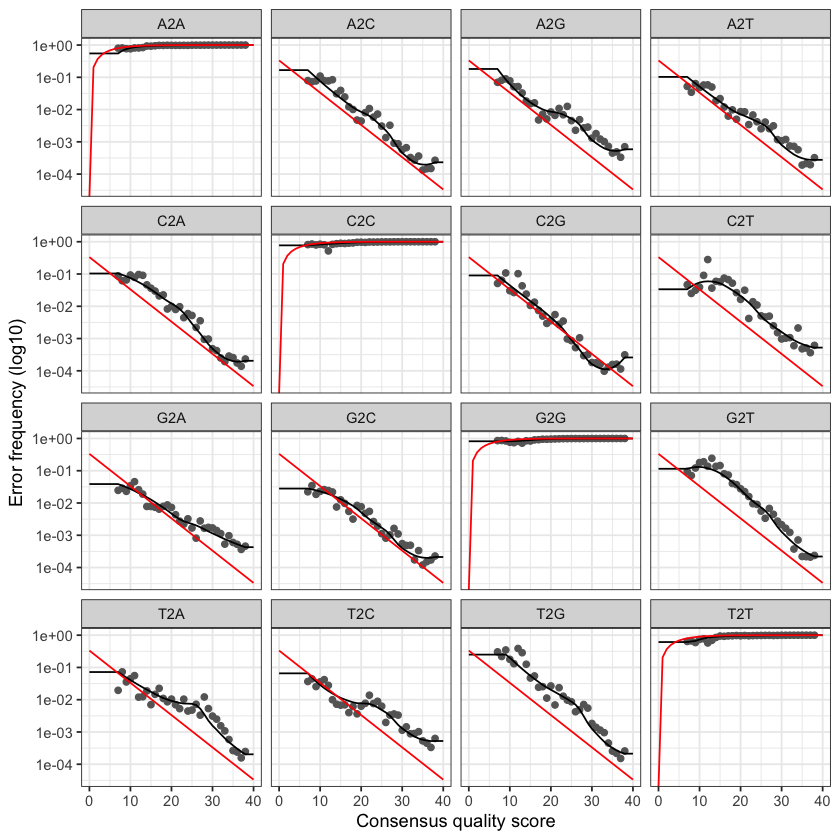

In [51]:
plotErrors(errF, nominalQ=TRUE)

The error rates for each possible transition (A→C, A→G, …) are shown. Points are the observed error rates for each consensus quality score. 
- The black line shows the estimated error rates after convergence of the machine-learning algorithm. 
- The red line shows the error rates expected under the nominal definition of the Q-score. Here the estimated error rates (black line) are a good fit to the observed rates (points), and the error rates drop with increased quality as expected. 
  
  
Everything looks reasonable and we proceed with confidence.

 



## Sample Inference

The DADA2 algorithm inferred 128 true sequence variants from the 1979 unique sequences in the first sample. There is much more to the dada-class return object than this (see help("dada-class") for some info), including multiple diagnostics about the quality of each denoised sequence variant, but that is beyond the scope of an introductory tutorial.



In [52]:
dadaFs <- dada(filtFs, err=errF, multithread=TRUE)

Sample 1 - 61644 reads in 12460 unique sequences.
Sample 2 - 102104 reads in 21856 unique sequences.
Sample 3 - 23322 reads in 8767 unique sequences.
Sample 4 - 15940 reads in 6154 unique sequences.
Sample 5 - 42743 reads in 12495 unique sequences.
Sample 6 - 33102 reads in 9749 unique sequences.
Sample 7 - 72868 reads in 17744 unique sequences.
Sample 8 - 75852 reads in 17229 unique sequences.
Sample 9 - 87180 reads in 20382 unique sequences.
Sample 10 - 149978 reads in 21593 unique sequences.
Sample 11 - 123148 reads in 21197 unique sequences.
Sample 12 - 96060 reads in 20518 unique sequences.
Sample 13 - 146852 reads in 30201 unique sequences.
Sample 14 - 87818 reads in 13520 unique sequences.
Sample 15 - 133305 reads in 24493 unique sequences.
Sample 16 - 96440 reads in 21506 unique sequences.
Sample 17 - 72004 reads in 14866 unique sequences.
Sample 18 - 50186 reads in 12246 unique sequences.
Sample 19 - 32665 reads in 8863 unique sequences.
Sample 20 - 86686 reads in 21976 unique

In [53]:
dadaRs <- dada(filtRs, err=errR, multithread=TRUE)

Sample 1 - 61644 reads in 11488 unique sequences.
Sample 2 - 102104 reads in 13920 unique sequences.
Sample 3 - 23322 reads in 5265 unique sequences.
Sample 4 - 15940 reads in 2013 unique sequences.
Sample 5 - 42743 reads in 9460 unique sequences.
Sample 6 - 33102 reads in 6888 unique sequences.
Sample 7 - 72868 reads in 13122 unique sequences.
Sample 8 - 75852 reads in 10820 unique sequences.
Sample 9 - 87180 reads in 20496 unique sequences.
Sample 10 - 149978 reads in 15590 unique sequences.
Sample 11 - 123148 reads in 14683 unique sequences.
Sample 12 - 96060 reads in 8479 unique sequences.
Sample 13 - 146852 reads in 22690 unique sequences.
Sample 14 - 87818 reads in 7367 unique sequences.
Sample 15 - 133305 reads in 15531 unique sequences.
Sample 16 - 96440 reads in 13109 unique sequences.
Sample 17 - 72004 reads in 11454 unique sequences.
Sample 18 - 50186 reads in 5707 unique sequences.
Sample 19 - 32665 reads in 6236 unique sequences.
Sample 20 - 86686 reads in 18422 unique seq

## Merging Pairs

In [54]:
mergers <- mergePairs(dadaFs, filtFs, dadaRs, filtRs, verbose=TRUE)
# Inspect the merger data.frame from the first sample
head(mergers[[1]])

0 paired-reads (in 0 unique pairings) successfully merged out of 61565 (in 1709 pairings) input.

10 paired-reads (in 6 unique pairings) successfully merged out of 101529 (in 4469 pairings) input.

1063 paired-reads (in 105 unique pairings) successfully merged out of 22446 (in 2776 pairings) input.

0 paired-reads (in 0 unique pairings) successfully merged out of 15915 (in 763 pairings) input.

798 paired-reads (in 25 unique pairings) successfully merged out of 41716 (in 4051 pairings) input.

2285 paired-reads (in 331 unique pairings) successfully merged out of 32306 (in 2937 pairings) input.

65 paired-reads (in 9 unique pairings) successfully merged out of 72565 (in 4885 pairings) input.

15 paired-reads (in 3 unique pairings) successfully merged out of 75420 (in 2178 pairings) input.

2407 paired-reads (in 312 unique pairings) successfully merged out of 86870 (in 5747 pairings) input.

771 paired-reads (in 53 unique pairings) successfully merged out of 148782 (in 4215 pairings) inp

sequence,abundance,forward,reverse,nmatch,nmismatch,nindel,prefer,accept
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>


## Construct sequence table

In [55]:
# Inspect distribution of sequence lengths
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

[1]  51 993

In [56]:
# Inspect distribution of sequence lengths
table(nchar(getSequences(seqtab)))


240 251 254 256 266 267 276 285 286 287 288 289 290 297 298 299 305 309 313 318 
 14   1   1   1   1   2   1   5 308   2   1 307  98  48 107   4   3   2   3  73 
319 321 323 324 328 343 355 385 388 
  1   1   1   2   1   1   2   1   1 

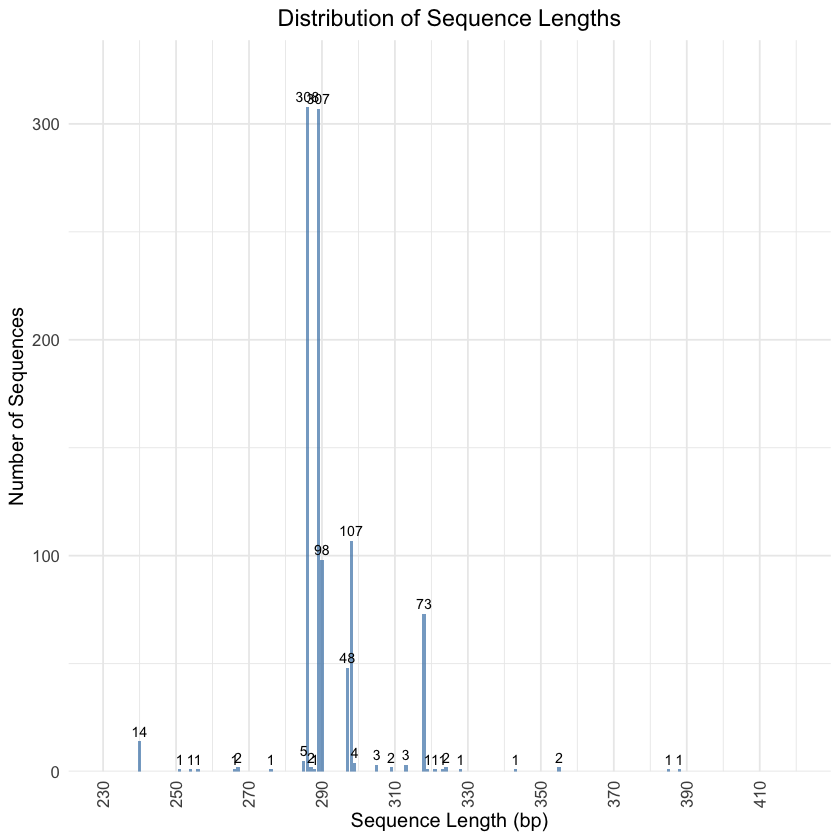

In [57]:
# Convert sequence length table to a data frame for plotting
# Convert sequence length table to a data frame for plotting
seq_lengths <- data.frame(
    Length = as.numeric(names(table(nchar(getSequences(seqtab))))),
    Count = as.numeric(table(nchar(getSequences(seqtab))))
)

# Create the distribution plot with modified x-axis
ggplot(seq_lengths, aes(x = Length, y = Count)) +
    geom_bar(stat = "identity", fill = "steelblue", alpha = 0.7) +
    geom_text(aes(label = Count), vjust = -0.5, size = 3) +  # Add count labels
    labs(
        title = "Distribution of Sequence Lengths",
        x = "Sequence Length (bp)",
        y = "Number of Sequences"
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)  # Rotate x-axis labels
    ) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +  # Add space for labels
    scale_x_continuous(
        limits = c(230, 420),  # Set the range
        breaks = seq(230, 420, by = 20)  # Show labels every 20 bp
    )


# # Save the plot
# ggsave("results/figures/sequence_length_distribution.pdf", width = 10, height = 6)

## Filtering singleton sequences

[1] "Distribution of sequence frequencies:"


seq_freq
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
126 103  53  61  41  35  37  40  21  24  25  23  20  23  15  12  14  14  14  11 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  6   6   8   6   7   3   9   3  10   8   7   8   3   4   5   5   4   4   1   3 
 41  42  43  44  45  47  49  50  51  53  54  55  56  59  60  61  62  63  64  66 
  2   2   5   2   4   1   1   1   2   1   3   2   1   1   2   2   3   1   1   1 
 68  71  74  79  82  87  88  90  94  97  98  99 103 107 115 117 122 124 127 134 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1 
137 146 210 
  1   1   1 

[1] "Percentage of singleton sequences: 14.25% (126 out of 884)"
[1] "Original sequence table dimensions:"


[1]  51 884

[1] "After removing singletons:"


[1]  51 758

[1] "After requiring presence in at least 2 samples:"


[1]  51 198

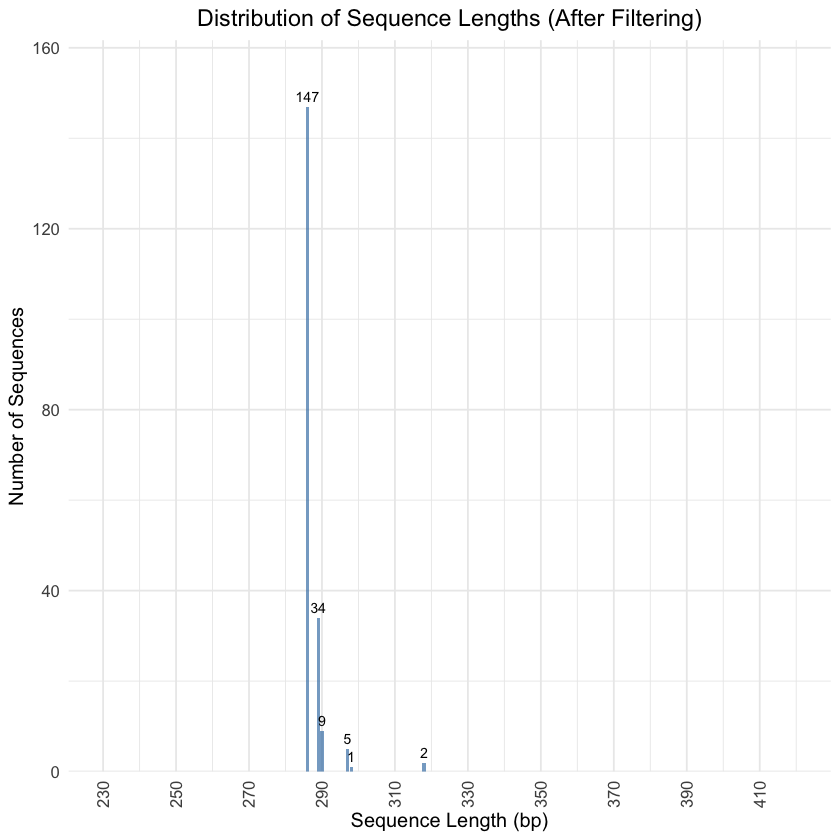

In [45]:
# Analyze sequence prevalence
# Get sequence frequencies
seq_freq <- rowSums(t(seqtab))
print("Distribution of sequence frequencies:")
table(seq_freq)

# Calculate percentage of singletons
n_singletons <- sum(seq_freq == 1)
total_seqs <- length(seq_freq)
print(sprintf("Percentage of singleton sequences: %.2f%% (%d out of %d)",
      (n_singletons/total_seqs)*100, n_singletons, total_seqs))

# Create a filtered sequence table removing singletons and rare sequences
# Option 1: Remove singletons
seqtab_nosingle <- seqtab[,colSums(seqtab) > 1]

# Option 2: More stringent - Remove sequences that don't appear in at least 2 samples
seqtab_filtered <- seqtab[,colSums(seqtab > 0) >= 2]

# Compare the dimensions
print("Original sequence table dimensions:")
dim(seqtab)
print("After removing singletons:")
dim(seqtab_nosingle)
print("After requiring presence in at least 2 samples:")
dim(seqtab_filtered)

# Look at the distribution again after filtering
seq_lengths_filtered <- data.frame(
    Length = as.numeric(names(table(nchar(getSequences(seqtab_filtered))))),
    Count = as.numeric(table(nchar(getSequences(seqtab_filtered))))
)

# Plot the filtered distribution
ggplot(seq_lengths_filtered, aes(x = Length, y = Count)) +
    geom_bar(stat = "identity", fill = "steelblue", alpha = 0.7) +
    geom_text(aes(label = Count), vjust = -0.5, size = 3) +
    labs(
        title = "Distribution of Sequence Lengths (After Filtering)",
        x = "Sequence Length (bp)",
        y = "Number of Sequences"
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)
    ) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    scale_x_continuous(
        limits = c(230, 420),
        breaks = seq(230, 420, by = 20)
    )

## Remove chimeras

In [60]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab.nochim)

Identified 648 bimeras out of 993 input sequences.



[1]  51 345

In [61]:
sum(seqtab.nochim)/sum(seqtab)

[1] 0.4637204

In [46]:
seqtab_filtered.nochim <- removeBimeraDenovo(seqtab_filtered, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab_filtered.nochim)

Identified 134 bimeras out of 198 input sequences.



[1] 51 64

In [47]:
sum(seqtab_filtered.nochim)/sum(seqtab_filtered)

[1] 0.4601671

## Assign Taxonomy 

In [32]:
taxa <- assignTaxonomy(seqtab.nochim, "/Users/abhilashdhal/Desktop/DADA2Analysis/data/tax/silva_nr_v132_train_set.fa.gz", multithread=TRUE, tryRC=TRUE)
unname(head(taxa))

Eukaryota,NA,NA,NA,NA,NA
Bacteria,NA,NA,NA,NA,NA
Eukaryota,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA
Eukaryota,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA


In [34]:
taxa 

,Kingdom,Phylum,Class,Order,Family,Genus
CGCTCATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGGGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCGAGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACATGGTAACAGATCTCGTATGCCGTCTTCTGCTTGA,Eukaryota,NA,NA,NA,NA,NA
CCTACGGGGGGCAGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTGAGCTATACTAACTTTAGGGTTGGTTAATTTCATGCCAGCCACCACGGTCATACGATGAACCCAAGCTAATAGAGACTGGCGTAAAGAATGTTTTACATTATCCCTCAATAAAGCTAAATTTCACCTAAGTTGTAGAAAACCCTAGTTGATATAAAACAAACTACGAAAGTGGCTTTAATATTTCTGAATACACAATAGCGAAGATTCAAACTGGGATTAGATACCCTAGTAGTC,Bacteria,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGGGGATCTGGAAGCTTCAGGAAGCTTCTTTGAAGTGGAGGAATAACCAAAGAATAGAACAATTGTGTTAAGAGATATCCTTGTTTCCTGGTTGGAAACAATTTATTCTGACAACCAGACAGAGATAAACGTGAACGAGTGGCTCCGACAGGTGAACTAAGCAAAGTCCGGCTGACTGTGTCCTTCACAGCAGTCCCGGTGCCCAGACAGGCTCAGACACAGGTGTCAGCCTGACATTCGCAAATGCTCGAGGGTGGACGCCAGCTGTCAAGGGAAGAACCCGGATTAGATACCCCCGTAGTC,Eukaryota,NA,NA,NA,NA,NA
CCGTGATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGTGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCCTGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACCCGAAGACTGATCTCGTATGCCGTCTTCTGCTTGA,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGGGGATCTGGAAGCTTCAGGAAGCTTCTTTGAAGTGGAGGAATAACCAAAGAATAGAACAATTGTGTTAAGAGATATCCTTGTTTCCTGGTTGGAAACAATTTATTCTGACAACCAGACAGAGATAAACGTGAACGAGTGGCTCCGACAGGTGAACTAAGCAAAGTCCGGCTGACTGTGTCCTTCACAGCAGTCCCGGTGCCCAGACAGGCTCAGACACAGGTGTCAGCCTGACATTCGCAAATGCTCGAGGGTGGACGCCAGCTGTCAAGGGAAGAACCCGGATTAGATACCCTAGTAGTC,Eukaryota,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGCGAGCTTCCAGGCAGTGGGGCCCACCCCAAGGGCAGTCAGTCCCTTCGCAGATCCAAAGTAGCTGGGGAGCATAGTGACTGCAGGACCTCAGGTGCCTGGGCCCTGAGAGAGGGGAGGCCTGGGGGCGTGTGTCCAGGATGGGTGATGGCGGAGGTGGACAGGCTGCCTCTGCCTTCTGGAGTCCAGGGATTAGATACCCTAGTAGTCCTGTC,NA,NA,NA,NA,NA,NA
CCTATGGGGTGCTGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTGAGCTATACTAACTTTAGGGTTGGTTAATTTCATGCCAGCCACCACGGTCATACGATGAACCCAAGCTAATAGAGACTGGCGTAAAGAATGTTTTACATTATCCCTCAATAAAGCTAAATTTCACCTAAGTTGTAGAAAACCCTAGTTGATATAAAACAAACTACGAAAGTGGCTTTAATATTTCTGAATACACAATAGCGAAGATTCAAACTGGGATTAGATACCCTAGTAGTC,Bacteria,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCTAGGGTTCGTCAAGTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAACCGGCGTAAAGAGTGTTTTAGATCAATTCCCCTCAATAAAGCTAAAATTCACCTGAGTTGTAAAAAACTCCAGTTGATACAAAATAAACGACGAAAGTGGCTTTAACGCATCTGAACACACAATAGCTAAGACCCAAACTGGGATTAGAGACCCTAGTAGTC,Eukaryota,NA,NA,NA,NA,NA
CCGTGATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGTGGCAGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCTAGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACCCGAAGACTGATCTCGTATGCCGTCTTCTGCTTGA,Eukaryota,NA,NA,NA,NA,NA
GAATCATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGAGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCTAGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACGTGAGACCGAATCTCGTATGCCGTCTTCTGCTTGA,Eukaryota,NA,NA,NA,NA,NA


## Species level

In [33]:
taxa.plus <- addSpecies(taxa, "/Users/abhilashdhal/Desktop/DADA2Analysis/data/tax/silva_species_assignment_v132.fa.gz", verbose = TRUE)
colnames(taxa.plus) <- c('Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')

0 out of 329 were assigned to the species level.
Of which 0 had genera consistent with the input table.

In [35]:
taxa.plus 

,Kingdom,Phylum,Class,Order,Family,Genus,Species
CGCTCATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGGGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCGAGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACATGGTAACAGATCTCGTATGCCGTCTTCTGCTTGA,Eukaryota,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCAGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTGAGCTATACTAACTTTAGGGTTGGTTAATTTCATGCCAGCCACCACGGTCATACGATGAACCCAAGCTAATAGAGACTGGCGTAAAGAATGTTTTACATTATCCCTCAATAAAGCTAAATTTCACCTAAGTTGTAGAAAACCCTAGTTGATATAAAACAAACTACGAAAGTGGCTTTAATATTTCTGAATACACAATAGCGAAGATTCAAACTGGGATTAGATACCCTAGTAGTC,Bacteria,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGGGGATCTGGAAGCTTCAGGAAGCTTCTTTGAAGTGGAGGAATAACCAAAGAATAGAACAATTGTGTTAAGAGATATCCTTGTTTCCTGGTTGGAAACAATTTATTCTGACAACCAGACAGAGATAAACGTGAACGAGTGGCTCCGACAGGTGAACTAAGCAAAGTCCGGCTGACTGTGTCCTTCACAGCAGTCCCGGTGCCCAGACAGGCTCAGACACAGGTGTCAGCCTGACATTCGCAAATGCTCGAGGGTGGACGCCAGCTGTCAAGGGAAGAACCCGGATTAGATACCCCCGTAGTC,Eukaryota,NA,NA,NA,NA,NA,NA
CCGTGATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGTGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCCTGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACCCGAAGACTGATCTCGTATGCCGTCTTCTGCTTGA,NA,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGGGGATCTGGAAGCTTCAGGAAGCTTCTTTGAAGTGGAGGAATAACCAAAGAATAGAACAATTGTGTTAAGAGATATCCTTGTTTCCTGGTTGGAAACAATTTATTCTGACAACCAGACAGAGATAAACGTGAACGAGTGGCTCCGACAGGTGAACTAAGCAAAGTCCGGCTGACTGTGTCCTTCACAGCAGTCCCGGTGCCCAGACAGGCTCAGACACAGGTGTCAGCCTGACATTCGCAAATGCTCGAGGGTGGACGCCAGCTGTCAAGGGAAGAACCCGGATTAGATACCCTAGTAGTC,Eukaryota,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGCGAGCTTCCAGGCAGTGGGGCCCACCCCAAGGGCAGTCAGTCCCTTCGCAGATCCAAAGTAGCTGGGGAGCATAGTGACTGCAGGACCTCAGGTGCCTGGGCCCTGAGAGAGGGGAGGCCTGGGGGCGTGTGTCCAGGATGGGTGATGGCGGAGGTGGACAGGCTGCCTCTGCCTTCTGGAGTCCAGGGATTAGATACCCTAGTAGTCCTGTC,NA,NA,NA,NA,NA,NA,NA
CCTATGGGGTGCTGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTGAGCTATACTAACTTTAGGGTTGGTTAATTTCATGCCAGCCACCACGGTCATACGATGAACCCAAGCTAATAGAGACTGGCGTAAAGAATGTTTTACATTATCCCTCAATAAAGCTAAATTTCACCTAAGTTGTAGAAAACCCTAGTTGATATAAAACAAACTACGAAAGTGGCTTTAATATTTCTGAATACACAATAGCGAAGATTCAAACTGGGATTAGATACCCTAGTAGTC,Bacteria,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCTAGGGTTCGTCAAGTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAACCGGCGTAAAGAGTGTTTTAGATCAATTCCCCTCAATAAAGCTAAAATTCACCTGAGTTGTAAAAAACTCCAGTTGATACAAAATAAACGACGAAAGTGGCTTTAACGCATCTGAACACACAATAGCTAAGACCCAAACTGGGATTAGAGACCCTAGTAGTC,Eukaryota,NA,NA,NA,NA,NA,NA
CCGTGATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGTGGCAGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCTAGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACCCGAAGACTGATCTCGTATGCCGTCTTCTGCTTGA,Eukaryota,NA,NA,NA,NA,NA,NA
GAATCATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGAGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCTAGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACGTGAGACCGAATCTCGTATGCCGTCTTCTGCTTGA,Eukaryota,NA,NA,NA,NA,NA,NA


In [31]:
# taxa.print <- taxa # Removing sequence rownames for display only
# rownames(taxa.print) <- NULL


Eukaryota,NA,NA,NA,NA,NA,NA
Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,Mitochondria,NA,NA
Eukaryota,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA
Eukaryota,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA


## Taxonomy assignment diagnostics

In [36]:
# Check the initial taxonomy assignment
print("Initial taxonomy table dimensions:")
dim(taxa)
print("\nSample of initial assignments:")
head(taxa)

# Check for any NA or empty assignments
print("\nCounts of NA values in each taxonomic level:")
colSums(is.na(taxa))

[1] "Initial taxonomy table dimensions:"


[1] 329   6

[1] "\nSample of initial assignments:"


,Kingdom,Phylum,Class,Order,Family,Genus
CGCTCATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGGGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCGAGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACATGGTAACAGATCTCGTATGCCGTCTTCTGCTTGA,Eukaryota,NA,NA,NA,NA,NA
CCTACGGGGGGCAGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTGAGCTATACTAACTTTAGGGTTGGTTAATTTCATGCCAGCCACCACGGTCATACGATGAACCCAAGCTAATAGAGACTGGCGTAAAGAATGTTTTACATTATCCCTCAATAAAGCTAAATTTCACCTAAGTTGTAGAAAACCCTAGTTGATATAAAACAAACTACGAAAGTGGCTTTAATATTTCTGAATACACAATAGCGAAGATTCAAACTGGGATTAGATACCCTAGTAGTC,Bacteria,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGGGGATCTGGAAGCTTCAGGAAGCTTCTTTGAAGTGGAGGAATAACCAAAGAATAGAACAATTGTGTTAAGAGATATCCTTGTTTCCTGGTTGGAAACAATTTATTCTGACAACCAGACAGAGATAAACGTGAACGAGTGGCTCCGACAGGTGAACTAAGCAAAGTCCGGCTGACTGTGTCCTTCACAGCAGTCCCGGTGCCCAGACAGGCTCAGACACAGGTGTCAGCCTGACATTCGCAAATGCTCGAGGGTGGACGCCAGCTGTCAAGGGAAGAACCCGGATTAGATACCCCCGTAGTC,Eukaryota,NA,NA,NA,NA,NA
CCGTGATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGTGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCCTGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACCCGAAGACTGATCTCGTATGCCGTCTTCTGCTTGA,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGGGGATCTGGAAGCTTCAGGAAGCTTCTTTGAAGTGGAGGAATAACCAAAGAATAGAACAATTGTGTTAAGAGATATCCTTGTTTCCTGGTTGGAAACAATTTATTCTGACAACCAGACAGAGATAAACGTGAACGAGTGGCTCCGACAGGTGAACTAAGCAAAGTCCGGCTGACTGTGTCCTTCACAGCAGTCCCGGTGCCCAGACAGGCTCAGACACAGGTGTCAGCCTGACATTCGCAAATGCTCGAGGGTGGACGCCAGCTGTCAAGGGAAGAACCCGGATTAGATACCCTAGTAGTC,Eukaryota,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGCGAGCTTCCAGGCAGTGGGGCCCACCCCAAGGGCAGTCAGTCCCTTCGCAGATCCAAAGTAGCTGGGGAGCATAGTGACTGCAGGACCTCAGGTGCCTGGGCCCTGAGAGAGGGGAGGCCTGGGGGCGTGTGTCCAGGATGGGTGATGGCGGAGGTGGACAGGCTGCCTCTGCCTTCTGGAGTCCAGGGATTAGATACCCTAGTAGTCCTGTC,NA,NA,NA,NA,NA,NA


[1] "\nCounts of NA values in each taxonomic level:"


Kingdom  Phylum   Class   Order  Family   Genus 
     58     199     200     200     200     208

In [37]:
# Try species assignment with more detailed output
taxa.plus <- addSpecies(taxa, 
                       "/Users/abhilashdhal/Desktop/DADA2Analysis/data/tax/silva_species_assignment_v132.fa.gz", 
                       verbose = TRUE,
                       allowMultiple = TRUE)  # Allow multiple species matches

# Rename columns
colnames(taxa.plus) <- c('Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')

# Check the results
print("\nDimensions of taxa.plus:")
dim(taxa.plus)
print("\nSample of final assignments:")
head(taxa.plus)
print("\nCounts of NA values in each taxonomic level:")
colSums(is.na(taxa.plus))

# Check specifically for species assignments
print("\nNumber of non-NA species assignments:")
sum(!is.na(taxa.plus[,"Species"]))
print("\nUnique species found:")
length(unique(na.omit(taxa.plus[,"Species"])))

0 out of 329 were assigned to the species level.
Of which 0 had genera consistent with the input table.[1] "\nDimensions of taxa.plus:"


[1] 329   7

[1] "\nSample of final assignments:"


,Kingdom,Phylum,Class,Order,Family,Genus,Species
CGCTCATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGGGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCGAGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACATGGTAACAGATCTCGTATGCCGTCTTCTGCTTGA,Eukaryota,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCAGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTGAGCTATACTAACTTTAGGGTTGGTTAATTTCATGCCAGCCACCACGGTCATACGATGAACCCAAGCTAATAGAGACTGGCGTAAAGAATGTTTTACATTATCCCTCAATAAAGCTAAATTTCACCTAAGTTGTAGAAAACCCTAGTTGATATAAAACAAACTACGAAAGTGGCTTTAATATTTCTGAATACACAATAGCGAAGATTCAAACTGGGATTAGATACCCTAGTAGTC,Bacteria,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGGGGATCTGGAAGCTTCAGGAAGCTTCTTTGAAGTGGAGGAATAACCAAAGAATAGAACAATTGTGTTAAGAGATATCCTTGTTTCCTGGTTGGAAACAATTTATTCTGACAACCAGACAGAGATAAACGTGAACGAGTGGCTCCGACAGGTGAACTAAGCAAAGTCCGGCTGACTGTGTCCTTCACAGCAGTCCCGGTGCCCAGACAGGCTCAGACACAGGTGTCAGCCTGACATTCGCAAATGCTCGAGGGTGGACGCCAGCTGTCAAGGGAAGAACCCGGATTAGATACCCCCGTAGTC,Eukaryota,NA,NA,NA,NA,NA,NA
CCGTGATCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGTGGCTGCAGAGGGAGTGGGCTGGGGTGGGCGTCCCTGTCGGATCTGAAAGGGTGGCTGAGGGACTACACAGAGCACGGGGGAATTTGCTGAAGCGGAGGAAAGAGAGCAGGGACACACCCTGGCAGGAGGAGGGATTAGATACCCCTGTAGTCCTGTCTCTTATACACATCTCCGAGCCCACGAGACCCGAAGACTGATCTCGTATGCCGTCTTCTGCTTGA,NA,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGGGGATCTGGAAGCTTCAGGAAGCTTCTTTGAAGTGGAGGAATAACCAAAGAATAGAACAATTGTGTTAAGAGATATCCTTGTTTCCTGGTTGGAAACAATTTATTCTGACAACCAGACAGAGATAAACGTGAACGAGTGGCTCCGACAGGTGAACTAAGCAAAGTCCGGCTGACTGTGTCCTTCACAGCAGTCCCGGTGCCCAGACAGGCTCAGACACAGGTGTCAGCCTGACATTCGCAAATGCTCGAGGGTGGACGCCAGCTGTCAAGGGAAGAACCCGGATTAGATACCCTAGTAGTC,Eukaryota,NA,NA,NA,NA,NA,NA
CCTACGGGGGGCTGCAGCGAGCTTCCAGGCAGTGGGGCCCACCCCAAGGGCAGTCAGTCCCTTCGCAGATCCAAAGTAGCTGGGGAGCATAGTGACTGCAGGACCTCAGGTGCCTGGGCCCTGAGAGAGGGGAGGCCTGGGGGCGTGTGTCCAGGATGGGTGATGGCGGAGGTGGACAGGCTGCCTCTGCCTTCTGGAGTCCAGGGATTAGATACCCTAGTAGTCCTGTC,NA,NA,NA,NA,NA,NA,NA


[1] "\nCounts of NA values in each taxonomic level:"


Kingdom  Phylum   Class   Order  Family   Genus Species 
     58     199     200     200     200     208     329

[1] "\nNumber of non-NA species assignments:"


[1] 0

[1] "\nUnique species found:"


[1] 0

In [38]:
# Alternative approach with less stringent matching
taxa.plus2 <- addSpecies(taxa, 
                        "/Users/abhilashdhal/Desktop/DADA2Analysis/data/tax/silva_species_assignment_v132.fa.gz",
                        verbose = TRUE,
                        allowMultiple = TRUE,
                        tryRC = TRUE)  # Try reverse complement matching

colnames(taxa.plus2) <- c('Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')

# Compare results
print("Number of species assignments with original method:")
sum(!is.na(taxa.plus[,"Species"]))
print("Number of species assignments with alternative method:")
sum(!is.na(taxa.plus2[,"Species"]))

0 out of 329 were assigned to the species level.
Of which 0 had genera consistent with the input table.[1] "Number of species assignments with original method:"


[1] 0

[1] "Number of species assignments with alternative method:"


[1] 0

## Phylo Object Creation for Alpha and Beta Diversity

In [46]:
library(dada2)
library(phyloseq)
library(vegan)
library(DESeq2)
# library(ggplot2)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(ggrepel)
library(igraph)
library(SpiecEasi)
library(tidyverse)
library(reshape2)
library(data.table)

ERROR: Error in library(DESeq2): there is no package called ‘DESeq2’


In [45]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'DESeq2'

also installing the dependency ‘locfit’


Warning message in install.packages(...):
“installation of package ‘locfit’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘DESeq2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

